In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [64]:
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group ,labels

In [65]:
group,labels = createDataSet()
print(group[:,0])
labels

[ 1.  1.  0.  0.]


['A', 'A', 'B', 'B']

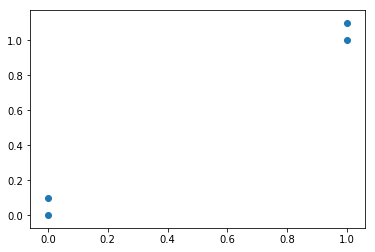

In [66]:
plt.scatter(group[:,0],group[:,1])

### K邻近算法伪代码
1. 计算已知类别数据集中的每个点与当前点之间的距离
2. 按照距离递增次序排序
3. 选取与当前点距离最小的K个点
4. 确定前K个点中所在类别的出现频率
5. 返回这K个点出现频率最高的类别作为当前点的预测分类

### KNN 开发流程： 
+ 收集数据：任何方法
+ 准备数据：距离计算所需要的数值，最好是结构化的数据格式
+ 分析数据：任何方法
+ 训练算法：此步骤不适用于 k-近邻算法
+ 测试算法：计算错误率
+ 使用算法：输入样本数据和结构化的输出结果，然后运行 k-近邻算法判断输入数据分类属于哪个分类，最后对计算出的分类执行后续处理

### 算法特点：  
+ 优点：精度高、对异常值不敏感、无数据输入假定
+ 缺点：计算复杂度高、空间复杂度高
+ 适用数据范围：数值型和标称型

In [67]:
X_train = pd.DataFrame(group,index=labels,columns=['x','y'])
X_train

,x,y
A,1.0,1.1
A,1.0,1.0
B,0.0,0.0
B,0.0,0.1


In [68]:
X_test = np.array([0.2,0.4])
X_test

array([ 0.2,  0.4])

In [81]:
#1.计算每个点与当前点之间的距离
X_train['Dis'] = np.sqrt(((X_train.x-X_test[0])**2+(X_train.y-X_test[1])**2))
X_train

,x,y,Dis
A,1.0,1.1,1.063015
A,1.0,1.0,1.000000
B,0.0,0.0,0.447214
B,0.0,0.1,0.360555


In [83]:
X_train.sort_values('Dis')#2.距离递增排序

,x,y,Dis
B,0.0,0.1,0.360555
B,0.0,0.0,0.447214
A,1.0,1.0,1.000000
A,1.0,1.1,1.063015


In [86]:
X_train.sort_values('Dis').iloc[:3]#3.选取距离最小的前3个点

,x,y,Dis
B,0.0,0.1,0.360555
B,0.0,0.0,0.447214
A,1.0,1.0,1.000000


In [119]:
y = X_train.sort_values('Dis').iloc[:3].index.to_series().mode()#4&5.找出出现频率最高的类别作为当前点的预测分类
print('The point [%.2f,%.2f] is belong to %s'%(X_test[0],X_test[1],y[0]))

The point [0.20,0.40] is belong to B


In [122]:
def knn(X_test,X_train,n):
    X_train['Dis'] = np.sqrt(((X_train.x-X_test[0])**2+(X_train.y-X_test[1])**2))
    y = X_train.sort_values('Dis').iloc[:n].index.to_series().mode()
    print('The point [%.2f,%.2f] is belong to %s'%(X_test[0],X_test[1],y[0]))
    return y[0]

In [125]:
knn(X_test,X_train,3)

The point [0.20,0.40] is belong to B


'B'

### 使用KNN改进约会网站的配对效果
+ 收集数据：提供文本文件
+ 准备数据：使用 Python 解析文本文件
+ 分析数据：使用 Matplotlib 画二维散点图
+ 训练算法：此步骤不适用于 k-近邻算法
+ 测试算法：使用海伦提供的部分数据作为测试样本。
>测试样本和非测试样本的区别在于：  
> 测试样本是已经完成分类的数据，如果预测分类与实际类别不同，则标记为一个错误。
+ 使用算法：产生简单的命令行程序，然后海伦可以输入一些特征数据以判断对方是否为自己喜欢的类型。

In [11]:
names = ['flyMiles','gametime','Icecreams','labels']
data  = pd.read_table('.\data\datingTestSet2.txt',names=names,sep='\t',header=None)
data=data.set_index('labels')

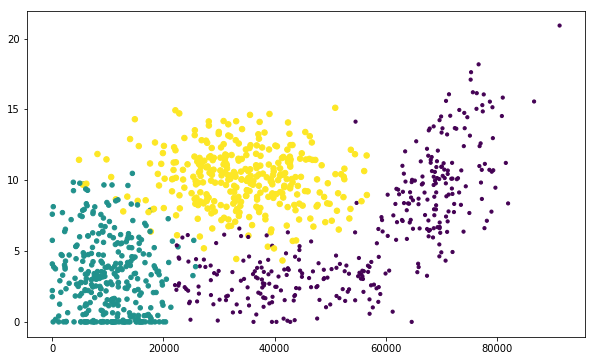

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(data['flyMiles'],data['gametime'],10*data.index,10*data.index)


In [14]:
data.describe()

,flyMiles,gametime,Icecreams
count,1000.000000,1000.000000,1000.000000
mean,33635.421000,6.559961,0.832073
std,21957.006833,4.243618,0.497239
min,0.000000,0.000000,0.001156
25%,13796.000000,2.933963,0.408995
50%,31669.000000,6.595204,0.809420
75%,47716.250000,10.056500,1.272847
max,91273.000000,20.919349,1.695517


In [19]:
regdata= (data-dmin)/data.max()-data.min()

In [48]:
X_train = regdata.iloc[:900].copy()

In [49]:
X_train[:10]

,flyMiles,gametime,Icecreams
labels,,,
3,0.448325,0.398051,0.560794
2,0.158733,0.341955,0.985415
1,0.285429,0.068925,0.473017
1,0.823201,0.628480,0.251161
1,0.420102,0.079820,0.077369
1,0.799722,0.484802,0.607389
3,0.393851,0.326530,0.713691
3,0.467455,0.634645,0.318938
1,0.739507,0.412612,0.440079


In [50]:
X_test =regdata.iloc[900].copy()

In [51]:
X_test

flyMiles     0.513766
gametime     0.170320
Icecreams    0.260847
Name: 1, dtype: float64

In [64]:
def knnpredictdating(X_train,X_test,n):
    X_train['Dis'] = np.sqrt((X_train.flyMiles-X_test[0])**2+(X_train.gametime-X_test[1])**2+(X_train.Icecreams-X_test[2])**2)#计算距离
    y = X_train.sort_values('Dis').iloc[:50].index.to_series().mode()#排序并求众数
    #print('The point [%.2f,%.2f,%.2f] is belong to %s'%(X_test[0],X_test[1],X_test[2],y[0]))
    return y[0]

In [66]:
knnpredictdating(X_train,X_test.iloc[0],50)

1

In [77]:
X_train = regdata.iloc[1:900].copy()
X_test = regdata.iloc[900:].copy()
result =[]
for x in range(100):
    y = knnpredictdating(X_train,X_test.iloc[x],50)
    result.append(y)

MSE = sum(abs((np.array(X_test.index.tolist()) - np.array(result))**2))/len(result)
    
MSE#均方差

0.16

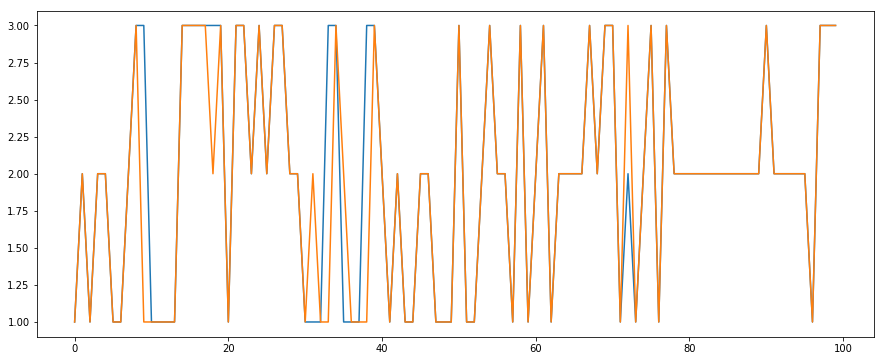

In [82]:
plt.figure(figsize=(15,6))
plt.plot(np.array(X_test.index.tolist()))
plt.plot(np.array(result))

### 手写数字识别系统
